In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
max_sentences = pd.read_pickle("max_sentences.pkl")

In [3]:
def plot_interaction_as_grid(example, interaction_values,prediction=None,extensionType="diagonal"):
    if len(interaction_values.shape) == 1:
        interaction_values = extend_interaction_values(interaction_values,extensionType)
    fig, ax = plt.subplots(figsize=(10,10))
    abs_max = np.max(np.abs(interaction_values))
    im = ax.imshow(interaction_values,vmin=-abs_max,vmax=abs_max,cmap="seismic")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(example)))
    ax.set_yticks(np.arange(len(example)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(example)
    ax.set_yticklabels(example)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(example)):
        for j in range(i,len(example)):
            text = ax.text(j, i, "{:.2f}".format(interaction_values[i, j]),
                           ha="center", va="center", color="k")

    fig.tight_layout()
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    if prediction is not None:
        ax.set_title("Prediction : {:.2f}".format(prediction))
    plt.show()

def extend_interaction_values(linear_values,extensionType):
    if extensionType == "diagonal":
        return transform_linear_values_to_diagonal(linear_values)
    else:
        return extend_linear_values_with_diagonal(linear_values)
    
def extend_linear_values_with_diagonal(linear_values):
    extension = np.zeros([linear_values.shape[0],linear_values.shape[0]])
    for i,feature_1 in enumerate(linear_values):
        extension[i,i] = feature_1
        for j, feature_2 in enumerate(linear_values[i+1:]):
            extension[i,i+1+j] = feature_1 + feature_2
    return extension

def transform_linear_values_to_diagonal(linear_values):
    extension = np.zeros([linear_values.shape[0],linear_values.shape[0]])
    for i,feature in enumerate(linear_values):
        extension[i,i] = feature
    return extension

In [4]:
def plot_interaction_as_bar(example, interaction_values,prediction=None,extensionType="diagonal",k=5):
    if len(interaction_values.shape) == 1:
        interaction_values = extend_interaction_values(interaction_values,extensionType)
    fig, ax = plt.subplots(figsize=(10,10))
    values, labels = get_top_k_interactions(example, interaction_values,k=k)
    barlist= plt.barh(labels[::-1], values[::-1])
    abs_max = np.max(np.abs(interaction_values))
    c_map = plt.cm.get_cmap("seismic")
    for i,value in enumerate(values[::-1]):
        barlist[i].set_color(c_map((value+abs_max)/(2*abs_max)))
    
def get_top_k_interactions(example, interaction_values,k=5):
    number_featuers = interaction_values.shape[0]
    order = np.argsort(-np.abs(interaction_values.flatten()))[:k]
    values, labels = [], []
    for postion in order:
        row = int(postion / number_featuers)
        column =  postion % number_featuers
        if row == column:
            label = example[row]
        else:
            label = "({},{})".format(example[row],example[column])
        value = interaction_values[row,column]
        values.append(value)
        labels.append(label)
    return values,labels

In [5]:
max_sentences

,label,text,before_max_sentence,after_max_sentence,predictions,predictions_for_complete_reviews,split,values,lime_values
1,1,Tommy Boy is a classic and we will always rem...,For only doing a few movies with his life the ...,From appearing on Saturday NIGHT LIVE to doin...,0.997408,0.472429,"[, Tommy, Boy, is, a, classic, and, we, will, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.08576353786022274, 0.0178258122713257..."
4,1,"Has big-studio feel, understands the horror g...","Remarkably well done, but under-recognized bec...","Could have been a college cult classic, if it...",0.995216,0.477980,"[, Has, big-studio, feel,, understands, the, h...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.028606192079107282, 0.1150472561553019..."
16,1,The story took such twist & turns that made i...,Nurse Betty was definitely one of the most cre...,"If you're sick of the recent formula movies, ...",0.997445,0.454467,"[, The, story, took, such, twist, &, turns, th...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.07168330955494903, 0.2043593997256307..."
18,0,Monotonous murky drama with an endless drone ...,"Looking all of 29 years old, Rob Lowe is a det...",This is a good substitute sleeping remedy if y...,0.142212,0.456349,"[, Monotonous, murky, drama, with, an, endless...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.2674440778638187, 1.1687928750633805,..."
32,1,The Cormen B-movie style is all over this pup...,Black Scorpion is Roger Cormen's Batman Which...,There are plenty of stunts and hot babes to m...,0.425229,0.440325,"[, The, Cormen, B-movie, style, is, all, over,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.16820630387994906, -0.0550705096866509..."
...,...,...,...,...,...,...,...,...,...
12479,0,Their was hardly any action at all and the ch...,I was actually looking forward to this movie ...,The only saving grace was Omar Epps and even ...,0.001675,0.473864,"[, Their, was, hardly, any, action, at, all, a...",None,None
12481,0,This Movie Was In My Opinion Very Ignorant! Th...,,The Police Procedure Was Unrealistic The Car...,0.002929,0.457114,"[This, Movie, Was, In, My, Opinion, Very, Igno...",None,None
12482,1,It is one movie that you MUST see or you have ...,Certainly this proves beyond a shadow of doubt...,I rank it 58 in the top 100 films of all time...,0.997814,0.448931,"[It, is, one, movie, that, you, MUST, see, or,...",None,None
12488,1,Good Effects and Acting make this movie a mus...,Critters 4 is a good movie A bit of a twist t...,I would recommend this to Horror/Science Fict...,0.996549,0.444415,"[, Good, Effects, and, Acting, make, this, mov...",None,None


In [6]:
#Numbers of sentences used in the paper
#977 - " It isn't the greatest scifi flick I've every seen, but it is not a bad movie" - Example in introduction Figure 2, Figure 3
#Examples in the appendix
# 283, 322, 865, 877, 76
number = 977
max_sentences["text"].iloc[number] 

" It isn't the greatest scifi flick I've every seen, but it is not a bad movie"

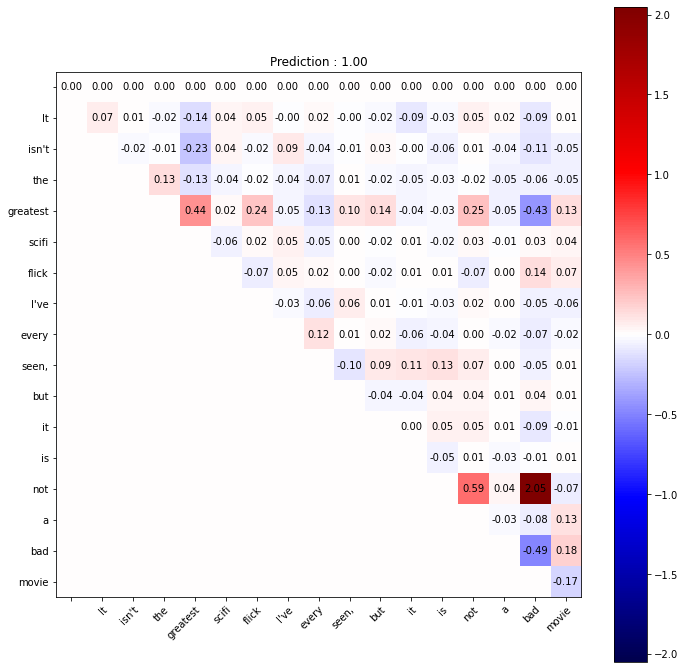

In [7]:
plot_interaction_as_grid(max_sentences["split"].iloc[number],
                         max_sentences["values"].iloc[number],
                         prediction=max_sentences["predictions"].iloc[number])

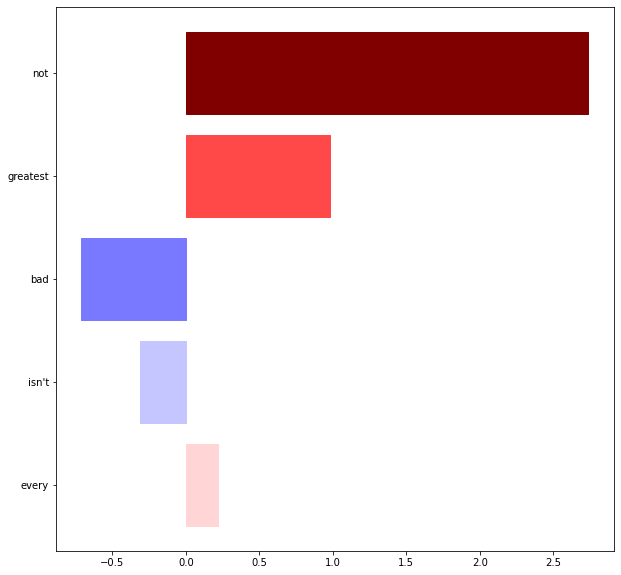

In [8]:
plot_interaction_as_bar(max_sentences["split"].iloc[number], 
                        max_sentences["lime_values"].iloc[number], #Lime values
                        prediction=max_sentences["predictions"].iloc[number],
                        extensionType="diagonal",
                        k=5)

## Some helper functions to create the pdfplots in latex

In [305]:
##
harvest = max_sentences["values"].iloc[number]
harvest = harvest/np.max(np.abs(harvest))
print("\def\\values{{")
for row in harvest[1:,1:]:
    print("{", end="")
    for entry in row:
        print("{:.2f}".format(entry),end=", ")
    print("},")
print("}}")
print(len(harvest))

\def\values{{
{-0.17, 0.11, 0.25, 0.03, 0.24, 0.03, -0.01, -0.05, -0.15, -0.28, },
{0.00, 0.04, -0.07, 0.13, -0.09, -0.13, -0.03, 0.19, 0.08, -0.05, },
{0.00, 0.00, 0.19, -0.02, 0.22, -0.44, 0.02, 0.06, 0.11, -0.16, },
{0.00, 0.00, 0.00, -0.08, 0.29, -0.06, -0.11, -0.08, -0.09, -0.04, },
{0.00, 0.00, 0.00, 0.00, -0.21, 0.05, -0.05, -0.02, 0.00, 0.01, },
{0.00, 0.00, 0.00, 0.00, 0.00, -0.51, 0.23, -0.04, -0.26, 0.21, },
{0.00, 0.00, 0.00, 0.00, 0.00, 0.00, -0.61, 0.03, -0.15, 0.37, },
{0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.12, 0.16, 0.06, },
{0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.30, 1.00, },
{0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, -0.37, },
}}
11


In [306]:
for word in max_sentences["split"].iloc[number]:
    print("\"{}\"".format(word),end=", ")

"", "However", "for", "a", "low", "cost", "B-Series", "movie", "it's", "not", "bad", 

In [309]:
def lime_for_paper(example, interaction_values,prediction=None,extensionType="diagonal",k=5):
    if len(interaction_values.shape) == 1:
        interaction_values = extend_interaction_values(interaction_values,extensionType)
    values, labels = get_top_k_interactions(example, interaction_values,k=k)
    max_v = np.max(np.abs(values))
    barlist= plt.barh(labels[::-1], values[::-1])
    print("\draw (axis cs:0,{}) -- (axis cs:0,{});".format(labels[0],labels[-1]))
    for label, value in zip(labels[::-1],values[::-1]):
        print("\\addplot[cellColor={},forget plot,text  =black] coordinates {}({},{}){};".format(int(1000*((value+max_v)/(2*max_v))),"{",value,label,"}"))
    for label, value in zip(labels[::-1],values[::-1]):
        print("{},".format(label),end=" ")

\draw (axis cs:0,little) -- (axis cs:0,had);
\addplot[cellColor=412,forget plot,text  =black] coordinates {(-0.26943514077122427,had)};
\addplot[cellColor=396,forget plot,text  =black] coordinates {(-0.31880249087065116,was)};
\addplot[cellColor=337,forget plot,text  =black] coordinates {(-0.5019748598691895,effects)};
\addplot[cellColor=141,forget plot,text  =black] coordinates {(-1.106545264946068,horrible)};
\addplot[cellColor=0,forget plot,text  =black] coordinates {(-1.5445578475025283,little)};
had, was, effects, horrible, little, 

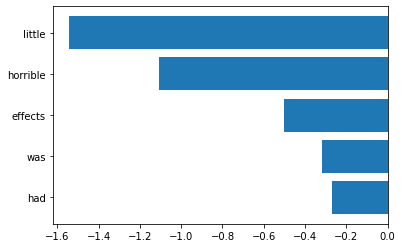

In [316]:
#977,877,283,865,322,76
number =322
lime_for_paper(max_sentences["split"].iloc[number], 
                        max_sentences["lime_values"].iloc[number], #Lime values
                        prediction=max_sentences["predictions"].iloc[number],
                        extensionType="diagonal",
                        k=5)